 # Statistical Analysis Tools

Data Science - CA#01: *Essential Statistical Analysis Tools* - Spring 1403 \
In this assignment, we are going to get acquainted with and implement some tools for statistical analysis. These tools could come to your help in your future research and projects.

## Monte Carlo Simulation

Monte Carlo Simulation is a computational technique used to understand the impact of uncertainty and variability in mathematical, statistical, and financial models. Named after the famous Monte Carlo Casino, known for its games of chance, this method relies on random sampling to obtain numerical results.

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

### Pi Calculation

The ratio of the points inside the circle to the total points is equivalent to the ratio of the area of the circle to the area of the square. Since the square has side length 1 (unit square) and the circle has radius 1, the area of a circle is given by the formula: 

$$A_{circle} = πr^{2}$$
 

For a unit circle (radius \( r = 1 \)), 


r=1, so 
$$A_{circle} = π$$

The area of a square is given by the formula: 

$$A_{square} = {side\_length}^{2}$$

For square of the circumference of circle:

$$ A_{square} = {(2r)}^{2}$$

Ratio of Areas:

The ratio of the area of the circle to the area of the square is 

$${A_{circle} / {A_{square}}} = {\pi}/{4} $$


In [2]:
NUM_POINTS_LIST = [10, 100, 1000, 10000, 100000, 100000, 1000000, 10000000]

In [3]:
def calc_pi(num_points):
    inside_circle = 0
    
    for _ in range(num_points):
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)
        if x**2 + y**2 <= 1:
            inside_circle += 1
            

    pi_estimate = 4 * inside_circle / num_points
    
    return pi_estimate

In [4]:
def estimate_pi(num_points_list):
    pi_estimates = []
    
    for num_points in num_points_list:
        pi_estimates.append(calc_pi(num_points))

    plt.figure(figsize=(10, 6))
    plt.plot(num_points_list, pi_estimates, marker='o', color="#2E7B7C")
    plt.axhline(y=np.pi, color="#F765A3", linestyle='--', label='True Pi Value')
    plt.xscale('log')
    plt.xlabel('Number of Points')
    plt.ylabel('Estimated Pi Value')
    plt.title('Estimating Pi using Monte Carlo Simulation')
    plt.legend()
    plt.grid(True)
    plt.show()

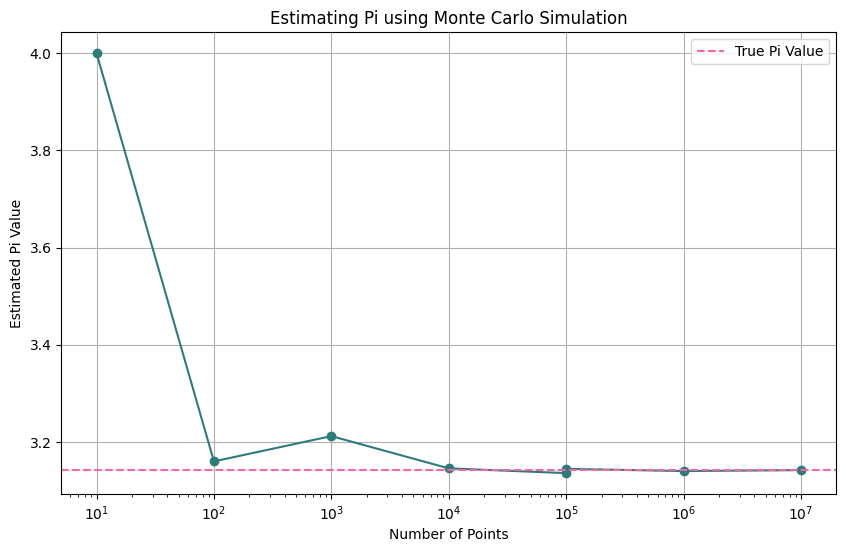

In [5]:
estimate_pi(NUM_POINTS_LIST)

As you can see, the more points there are. The results are more accurate and the probability of error in random experiments is less.

### Mensch Game

In [6]:
ITERATION = 100000

In [7]:
def roll_dice():
    return random.randint(1, 6)

def move_piece(player, steps):
    player['position'] += steps

def is_winner(player):
    return player['position'] >= 100

def simulate_game():
    players = [{'position': 0} for _ in range(4)]
    while True:
        for player in players:
            steps = roll_dice()
            move_piece(player, steps)
            if is_winner(player):
                return players.index(player)

In [8]:
def monte_carlo_simulation(iterations):
    results = {0: 0, 1: 0, 2: 0, 3: 0}
    for _ in range(iterations):
        winner = simulate_game()
        results[winner] += 1
    probabilities = {player: (results[player] / iterations) * 100 for player in results}
    return probabilities

In [9]:
def show_result(probabilities):
    players = [f"Player {i+1}" for i in range(4)]
    bars = plt.bar(players, probabilities.values(), color="#F765A3")
    plt.xlabel('Player')
    plt.ylabel('Probability of Winning (%)')
    plt.title('Monte Carlo Simulation Results')
    plt.ylim(0, 100)
    for bar, value in zip(bars, probabilities.values()):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{value:.2f}%", ha='center', va='bottom')
    plt.show()

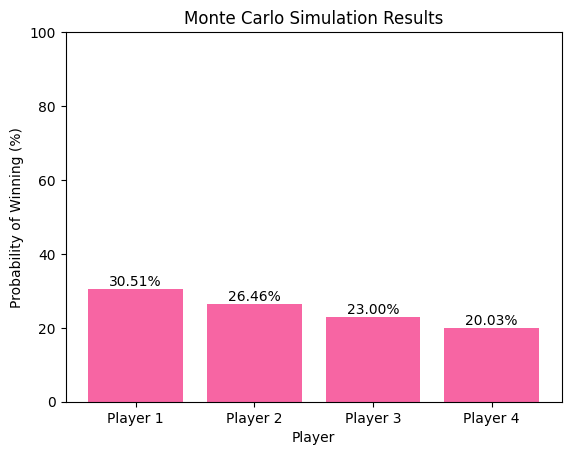

In [10]:
probabilities = monte_carlo_simulation(ITERATION)
show_result(probabilities)

## Central Limit Theorem(CLT)

### 1. Normal Distribution

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import poisson

In [12]:

def plot_samples_means_norm(num_samples, sample_size):
    samples = np.random.normal(0, 1, (num_samples, sample_size))
    sample_means = np.mean(samples, axis=1)
    plt.hist(sample_means, bins=30,density=True, alpha=0.6, color= "#F765A3", edgecolor='black')
    mu, std = norm.fit(sample_means) 
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    plt.xlabel('Sample Means')
    plt.ylabel('Frequency')
    plt.title('Sample Means with Sample Size ' + str(sample_size))
    plt.grid(True)
    plt.show()


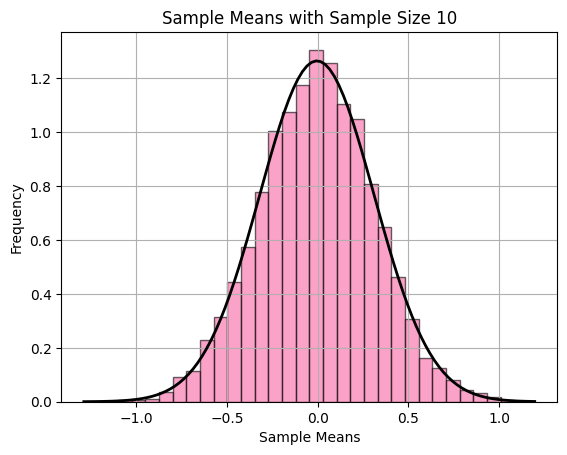

In [13]:
plot_samples_means_norm(5000, 10)

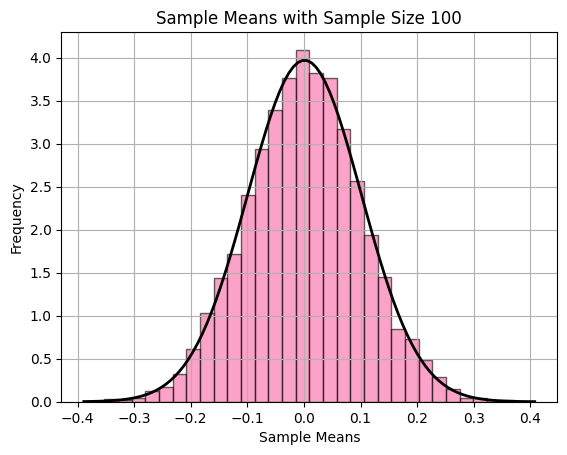

In [14]:
plot_samples_means_norm(5000, 100)

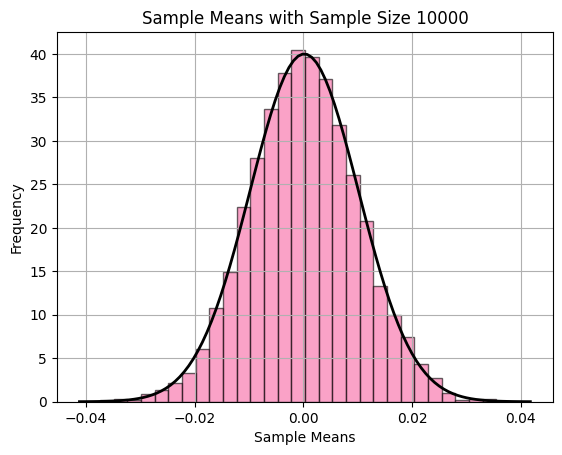

In [15]:
plot_samples_means_norm(5000, 10000)

As you can see, when we increase the sample size, The sampling distribution of the sample mean tends to follow a normal distribution, regardless of the shape of the population distribution, as long as the sample size is sufficiently large (typically n ≥ 30). Plus, when we increase the sample size the sampling distribution of the sample mean becomes narrower and more concentrated around the population mean. This means that as the sample size increases, the variability or spread of sample means decreases. The sample mean becomes a more accurate estimator of the population mean as the sample size increases. In other words, larger sample sizes provide more precise estimates of the population parameters.

### 2. Uniform Distribution

In [16]:
def plot_samples_means_uniform(num_samples, sample_size):
    samples = np.random.uniform(0, 1, (num_samples, sample_size))
    sample_means = np.mean(samples, axis=1)
    plt.hist(sample_means, bins=30,density=True, alpha=0.6, color='#2E7B7C', edgecolor='black')
    mu, std = norm.fit(sample_means) 
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    plt.xlabel('Sample Means')
    plt.ylabel('Frequency')
    plt.title('Sample Means with Sample Size ' + str(sample_size))
    plt.grid(True)
    plt.show()

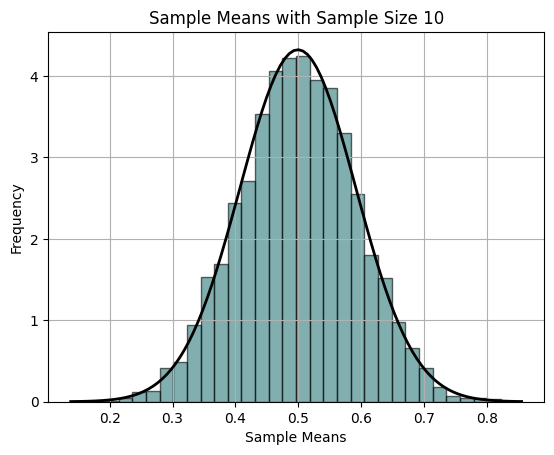

In [17]:
plot_samples_means_uniform(5000, 10)

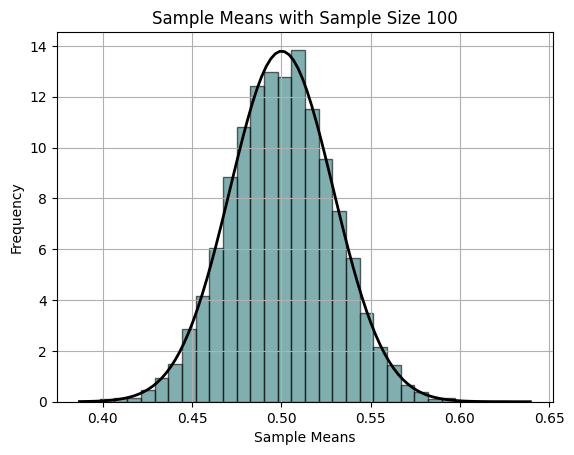

In [18]:
plot_samples_means_uniform(5000, 100)

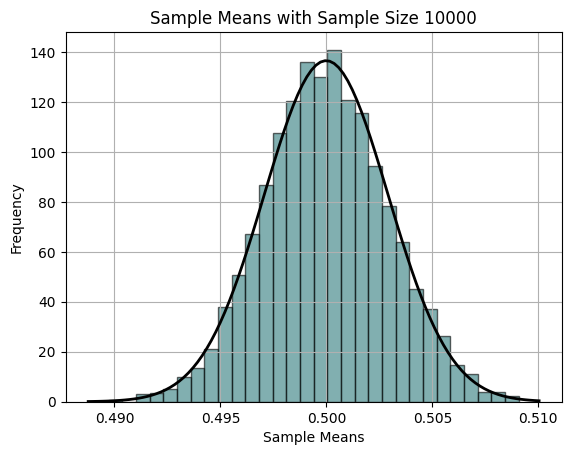

In [19]:
plot_samples_means_uniform(5000, 10000)

As discussed above, the larger the sample size, the more accurately the histogram will fit into the plot of normal distribution pdf.

### 3. Exponential Distribution

In [20]:
def plot_samples_means_exp(num_samples, sample_size):
    samples = np.random.exponential(scale=2, size=(num_samples, sample_size))
    sample_means = np.mean(samples, axis=1)
    plt.hist(sample_means, bins=30,density=True, alpha=0.6, color='#FFCAD4', edgecolor='black')
    mu, std = norm.fit(sample_means) 
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    plt.xlabel('Sample Means')
    plt.ylabel('Frequency')
    plt.title('Sample Means with Sample Size ' + str(sample_size))
    plt.grid(True)
    plt.show()

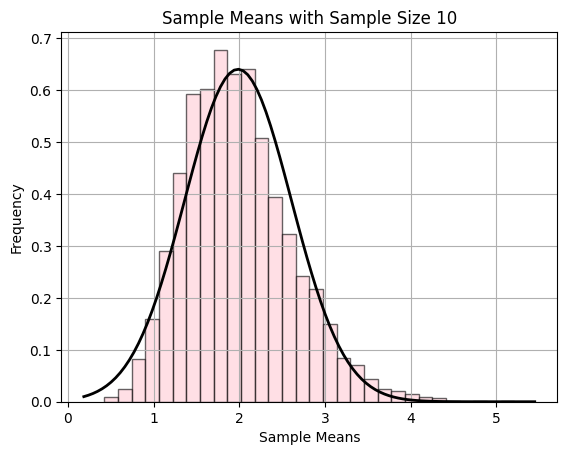

In [21]:
plot_samples_means_exp(5000, 10)

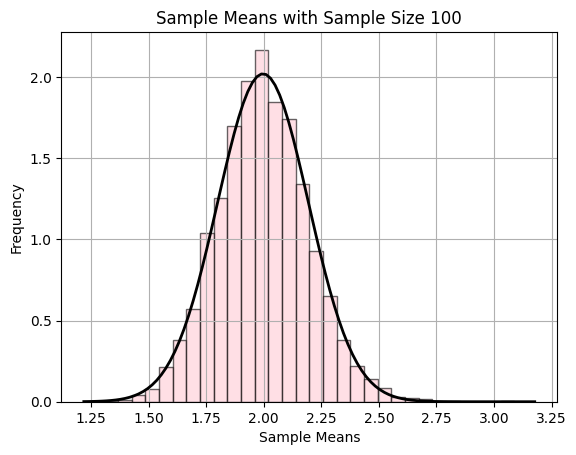

In [22]:
plot_samples_means_exp(5000, 100)

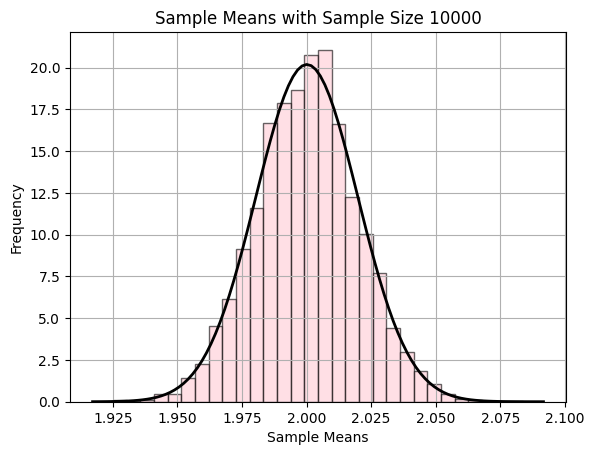

In [23]:
plot_samples_means_exp(5000, 10000)

Since the exponential distribution looks very different from normal distribution, with sample size of 10 the histogram does not fit into a normal distribution plot at all. Sample size should at least be 30 for this matter. And as expected, the larger the sample size, the more similar the plot is to normal distribution.

## Hypothesis Testing

Hypothesis testing is an essential tool in statistics and scientific research that allows us to
make informed decisions and come to a conclusion about population parameters based on
sample data. In this section, you will understand how hypothesis testing can help you to
analyze data and make a decision based on them in different situations.

### Unfair Coin

We will simulate an unfair coin that is biased toward landing on one face more often than the other one (about 10% more probable). Then, we will perform hypothesis testing to determine whether this coin is fair or not. We will use both confidence interval and p-value approaches for our test.

#### Simulation of Unfair Coin
Let's simulate the unfair coin by generating random numbers between 0 and 1. If the generated number is less than 0.55, we will consider it as "heads," otherwise as "tails."

In [24]:
import numpy as np
from scipy.stats import norm

prob_heads = 0.55 
def flip_unfair_coin(probability_heads, size):
    return np.random.choice([0, 1], size=size, p=[1 - probability_heads, probability_heads])




#### Hypothesis Testing
We will conduct hypothesis testing using different sample sizes: 30, 100, and 1000. For each sample size, we will calculate the z-score, p-value, make a decision regarding the null hypothesis, and provide justification for the decision.

The procedure is:

1. Simulate 30 coin flips using the unfair coin.
2. Calculate the proportion of "heads."
3. Perform hypothesis testing:
   - Null Hypothesis $$H_0$$: The coin is fair (\( $$p = 0.5$$ \)).
   - Alternative Hypothesis (\( $$H_a$$ \)): The coin is unfair (\( $$p \neq 0.5$$ \)).
4. Calculate the z-score and p-value.
5. Make a decision based on the p-value and confidence level (\( $$\alpha = 0.05$$ \)).

#### Confidence Interval:

In [25]:
def hypothesis_testing_confidence_interval(data, alpha, expected_probability):
    n = len(data)
    sample_mean = np.mean(data)
    sample_std = np.std(data, ddof=1)
    z_critical = norm.ppf(1 - alpha / 2)
    
    margin_of_error = z_critical * (sample_std / np.sqrt(n))
    confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
    
    fail_msg = "z critical is: " + str(round(z_critical, 4)) +  "The confidence interval is: " + "(" + str(round(confidence_interval[0],4)) + "," + str(round(confidence_interval[1],4)) + ")" +". Fail to reject null hypothesis"
    reject_msg = "z critical is: " + str(round(z_critical, 4)) +  "The confidence interval is: " + "(" + str(round(confidence_interval[0],4)) + "," + str(round(confidence_interval[1],4)) + ")" +". Reject null hypothesis"
    
    if expected_probability >= confidence_interval[0] and expected_probability <= confidence_interval[1]:
        return fail_msg
    else:
        return reject_msg

#### p-value:

In [26]:
def hypothesis_testing_p_value(data, alpha, expected_probability):
    n = len(data)
    sample_mean = np.mean(data)
    sample_std = np.std(data, ddof=1)
    z_score = (sample_mean - expected_probability) / (sample_std / np.sqrt(n))
    
    p_value = 2 * (1 - norm.cdf(abs(z_score)))

    fail_msg = "z_score is: " + str(round(z_score, 4)) + "p_value is: " + str(round(p_value, 4)) + ", Fail to reject null hypothesis"
    reject_msg = "z_score is: " + str(round(z_score, 4)) + "p_value is: " + str(round(p_value, 4)) + ", Reject null hypothesis"

    if p_value > alpha:
        return fail_msg
    else:
        return reject_msg

#### Preforming with three sample size:

In [27]:
alpha = 0.05  
sample_sizes = [30, 100, 1000]

for size in sample_sizes:
    print(f"\nSample size: {size}")
    data = flip_unfair_coin(prob_heads, size)
    print("The expected probability of sample is: ", prob_heads)
    print("Confidence Interval Approach:")
    print(hypothesis_testing_confidence_interval(data, alpha, prob_heads))
    print("P-Value Approach:")
    print(hypothesis_testing_p_value(data, alpha, prob_heads))


Sample size: 30
The expected probability of sample is:  0.55
Confidence Interval Approach:
z critical is: 1.96The confidence interval is: (0.4951,0.8382). Fail to reject null hypothesis
P-Value Approach:
z_score is: 1.3328p_value is: 0.1826, Fail to reject null hypothesis

Sample size: 100
The expected probability of sample is:  0.55
Confidence Interval Approach:
z critical is: 1.96The confidence interval is: (0.4931,0.6869). Fail to reject null hypothesis
P-Value Approach:
z_score is: 0.8092p_value is: 0.4184, Fail to reject null hypothesis

Sample size: 1000
The expected probability of sample is:  0.55
Confidence Interval Approach:
z critical is: 1.96The confidence interval is: (0.5101,0.5719). Fail to reject null hypothesis
P-Value Approach:
z_score is: -0.5708p_value is: 0.5681, Fail to reject null hypothesis


#### Analysis
Law of large numbers states that as more observations are collected, the proportion of occurrences with a particular outcome (𝑝 𝑛) converges to the probability of that outcome (𝑝).
Typically, larger sample sizes provide more precise estimates and result in more reliable hypothesis testing outcomes.
Increasing the sample size in a coin test would likely lead to more reliable and accurate results. With a larger sample size, the estimates of probabilities (e.g., the probability of heads or tails) would become more precise. This means that the observed frequencies would better represent the true underlying probabilities of the coin.
But we should take into the consideration that our Sampling is done without replacement, thus when we are taking larger samples from in proportian to the population, since the draws are not independent, it affects many assumptions and formulas that we use, like CLT.

• Certain conditions must be met for the CLT to apply:
1. Independence: Sampled observations must be independent. This 
is difficult to verify, but is more likely if:
• random sampling/assignment is used, and
• if sampling without replacement, 𝑛 < 10% of the population.
2. Sample size/skew: Either the population distribution is normal, or 
if the population distribution is skewed, the sample size is large.
• the more skewed the population distribution, the larger sample 
size we need for the CLT to apply 
• for moderately skewed distributions 𝑛 > 30 is a widely used rule 
of thumb

### Job placement
To test whether working alongside studying has a significant impact on students' grades, we will perform a hypothesis test. Let's define our hypotheses:

Null Hypothesis (H0): Working alongside studying does not have a significant impact on students' grades.

Alternative Hypothesis (H1): Working alongside studying has a significant negative impact on students' grades.

We will perform a two-sample t-test to compare the GPAs of students who are placed in jobs versus those who are not placed.

Split students into two groups based on their job placement status:

Group 1 (Placed): Students who are placed in jobs.

Group 2 (Not Placed): Students who are not placed in jobs.

In [28]:
import pandas as pd
import scipy.stats as stats

data = pd.read_csv("job_placement.csv")

placed_students = data[data["placement_status"] == "Placed"]
not_placed_students = data[data["placement_status"] == "Not Placed"]

Calculating the t-statistic and degrees of freedom for these two groups.
The t-statistic is computed using the formula:

$$t = \frac{{\bar{x}_1 - \bar{x}_2}}{{\sqrt{\frac{{s_1^2}}{{n_1}} + \frac{{s_2^2}}{{n_2}}}}}$$


where:
- \( $$\bar{x}_1, \bar{x}_2$$ \) are the means of the two groups,
- \( $$s_1^2, s_2^2$$ \) are the variances of the two groups,
- \( $$n_1, n_2$$ \) are the sizes of the two groups.

The degrees of freedom (\( df \)) is given by:

\[
$$df = n_1 + n_2 - 2$$
\]

In [29]:
mean_placed = placed_students["gpa"].mean()
std_placed = placed_students["gpa"].std()
n_placed = len(placed_students)

mean_not_placed = not_placed_students["gpa"].mean()
std_not_placed = not_placed_students["gpa"].std()
n_not_placed = len(not_placed_students)


t_statistic = (mean_placed - mean_not_placed) / \
    ((std_placed**2 / n_placed + std_not_placed**2 / n_not_placed)**0.5)
df = n_placed + n_not_placed - 2

With the calculated t-statistic and degrees of freedom, the p-value is obtained from the t-distribution.
If the p-value is less than the chosen significance level (\( \alpha \)), we reject the null hypothesis. Otherwise, we fail to reject the null hypothesis.


In [30]:
p_value = stats.t.sf(abs(t_statistic), df) * 2  # multiplied by 2 for two-tailed test

print("T-Statistic:", t_statistic)
print("Degrees of Freedom:", df)
print("P-Value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in GPAs between placed and not placed students.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in GPAs between placed and not placed students.")


T-Statistic: 4.442633347555541
Degrees of Freedom: 698
P-Value: 1.0331157919911526e-05
Reject null hypothesis: There is a significant difference in GPAs between placed and not placed students.


repeating the process with scipy:

In [31]:
import pandas as pd
import scipy.stats as stats


data = pd.read_csv("job_placement.csv")

placed_students = data[data["placement_status"] == "Placed"]["gpa"]
not_placed_students = data[data["placement_status"] == "Not Placed"]["gpa"]


t_statistic, p_value = stats.ttest_ind(placed_students, not_placed_students, equal_var=True)

print("T-Statistic:", round(t_statistic,5))
print("P-Value:", round(p_value,6))

alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in GPAs between placed and not placed students.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in GPAs between placed and not placed students.")

T-Statistic: 5.10532
P-Value: 0.0
Reject null hypothesis: There is a significant difference in GPAs between placed and not placed students.


#### Result
Based on the computed p-value, we compare it with our chosen significance level (\( $$\alpha$$ \)). If \( $$p \leq \alpha$$ \), we reject the null hypothesis; otherwise, we fail to reject it.

Based on the result and repeating the sampling, we can strongly reject the null hypothesis.

--- 

## Questions

### 1. Read alittle bit about the applications of Monte Carlo Simulation in real life. Whatare some of these applications?

- **Finance and Risk Management:** Pricing options, analyzing investment strategies, and managing financial risks.

- **Engineering and Manufacturing:** Simulating system performance, optimizing designs, and predicting outcomes in engineering and manufacturing processes.

- **Healthcare:** Modeling disease spread, evaluating treatment strategies, and predicting patient outcomes in healthcare.

- **Energy and Utilities:** Pricing derivatives, optimizing energy trading, and managing market uncertainties in the energy sector.

- **Climate Modeling:** Simulating climate systems, predicting climate trends, and assessing the impact of human activities on the environment.

- **Supply Chain Management:** Forecasting demand, optimizing inventory levels, and managing supply chain risks.

- **Telecommunications:** Analyzing network performance, planning capacity, and ensuring quality of service in telecommunications.

- **Physics and Astronomy:** Simulating particle interactions, modeling celestial phenomena, and analyzing astronomical data.

- **Project Management:** Scheduling, cost estimation, and risk analysis in project management.

- **Gaming and Entertainment:** Game development, character animation, and special effects rendering in gaming and entertainment industries.


### 2.How does the sample size affect your plots in part 2(CLT)? What can you understand from these plots?

Here's how the sample size affects our plots:

   - **Sample Size and Variability**:
        Smaller Sample Sizes: With smaller sample sizes, the sample means tend to vary widely, especially for distributions with higher variability (e.g., exponential distribution). The resulting plot may show more scattered sample means, indicating a less pronounced normal distribution shape.
        Larger Sample Sizes: As the sample size increases, the variability of sample means decreases. This means that sample means from larger samples tend to cluster closer to the population mean, leading to a tighter and more pronounced normal distribution shape in the plot.

   - **Convergence to Normality**:
        Smaller Sample Sizes: With small samples, the distribution of sample means may not appear perfectly normal. There may be skewness or kurtosis present in the plot due to the limited number of samples, especially for non-normally distributed populations.
        Larger Sample Sizes: The CLT states that as the sample size increases, the distribution of sample means becomes increasingly normal regardless of the population distribution (as long as certain conditions are met). Therefore, with sufficiently large sample sizes, the plot of sample means will closely resemble a normal distribution, even if the original population distribution is not normal.

   - **Accuracy of Estimation**:
        Smaller Sample Sizes: With small samples, there is a higher chance of estimation error in determining the properties of the population distribution based on sample means. Confidence intervals for the population parameters will be wider, reflecting this uncertainty.
        Larger Sample Sizes: Larger samples provide more accurate estimates of population parameters based on sample means. Confidence intervals become narrower, indicating greater confidence in the estimated values.
        When plotting sample means from normal, uniform, and exponential distributions with different sample sizes (10, 100, 10,000), several insights can be gleaned regarding the behavior of sample means and their convergence to a normal distribution as predicted by the Central Limit Theorem (CLT)

Overall, the plots of sample means from normal, uniform, and exponential distributions with increasing sample sizes demonstrate the principle of the CLT: regardless of the underlying distribution (as long as certain conditions are met), the distribution of sample means tends to approach normality as the sample size increases. Larger sample sizes result in sample means that exhibit less variability, reduced skewness, and closer adherence to a normal distribution, validating the CLT's predictions. Comparing the plots across different sample sizes provides a visual representation of this convergence and the impact of sample size on the behavior of sample means.

### 3. How does increasing the sample size affect your coin test?

Law of large numbers states that as more observations are collected, the proportion of occurrences with a particular outcome (𝑝 𝑛) converges to the probability of that outcome (𝑝).
Typically, larger sample sizes provide more precise estimates and result in more reliable hypothesis testing outcomes.
Increasing the sample size in a coin test would likely lead to more reliable and accurate results. With a larger sample size, the estimates of probabilities (e.g., the probability of heads or tails) would become more precise. This means that the observed frequencies would better represent the true underlying probabilities of the coin.
But we should take into the consideration that our Sampling is done without replacement, thus when we are taking larger samples from in proportian to the population, since the draws are not independent, it affects many assumptions and formulas that we use, like CLT.

### 4. What are t-statistic, degrees of freedom, and t-distribution in t-test? How can they help us to compare two data sets?

- **T-Statistic**: In a t-test, the t-statistic measures the difference between the means of two groups relative to the variation within the groups. It quantifies how large the difference is relative to the variability in the data. It is the ratio of the departure of the estimated value of a parameter from its hypothesized value to its standard error. It is used in hypothesis testing via Student's t-test. The t-statistic is used in a t-test to determine whether to support or reject the null hypothesis
- **Degrees of Freedom**: Degrees of freedom represent the number of independent pieces of information available to estimate a statistic. In the context of a t-test, The shape of a t-distribution is dependent on the number of degrees of freedom. It, therefore, follows that as the number of d.f. increases, the distribution becomes more ‘spiked,’ and its tails become thinner, closer to those of the normal distribution. it's the number of independent observations available to estimate the population parameters. It's calculated as the total sample size minus the number of parameters estimated from the data.
- **T-Distribution**: The t-distribution is a probability distribution that is symmetric and bell-shaped, much like the normal distribution. It's used in hypothesis testing when the sample size is small or when the population standard deviation is unknown. It helps us determine the probability of observing a particular t-statistic or one more extreme if the null hypothesis were true. 

Together, these components allow us to quantify the difference between two data sets and assess whether that difference is statistically significant.
The two-sample t-test is a statistical test used to determine if there is a significant difference between the means of two independent groups. It is often employed when comparing the means of two groups to determine if they are significantly different from each other.


### 5. What are the preliminary conditions for using t-test on our data?

Before using a t-test, it's important to ensure that the following conditions are met:
- The data should be approximately normally distributed. This can be assessed visually or through statistical tests like the Shapiro-Wilk test.
- The variances of the two groups being compared should be approximately equal. This can be checked using statistical tests like Levene's test.
- The data points should be independent of each other.
- When σ is unknown (which is almost always), use the t-distribution to address the uncertainty of the standard error estimate.

### 6. Read about some other types of tests that are used in scientific research. Write a line about each of them.

- **Chi-Square Test**: A statistical test used to determine whether there is a significant association between categorical variables.
- **ANOVA (Analysis of Variance)**: A statistical test used to compare the means of three or more groups to determine if there are statistically significant differences between them.
- **Regression Analysis**: A statistical method used to model the relationship between one or more independent variables and a dependent variable. It helps to understand how the value of the dependent variable changes when one of the independent variables is varied while the others are held constant.
- **Wilcoxon Signed-Rank Test**: A non-parametric statistical test used to compare two related samples to assess whether their population mean ranks differ.

Each of these tests serves specific purposes and is chosen based on the nature of the data and the research question at hand.